<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/0064_Data_Wisatawan_Jakarta_Dengan_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition

#MODELLING
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [61]:
pengunjung = pd.read_csv("data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv")

In [62]:
pengunjung.head()

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,516
1,2020,1,Taman Mini Indonesia Indah,0
2,2020,1,Taman Margasatwa Ragunan,449
3,2020,1,Monumen Nasional,2070
4,2020,1,Museum Nasional,2877


In [63]:
pengunjung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             20 non-null     int64 
 1   bulan             20 non-null     int64 
 2   destinasi_wisata  20 non-null     object
 3   jumlah            20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


DATA PREPROCESSING

In [64]:
pengunjung.drop_duplicates
pengunjung.shape

(20, 4)

In [35]:
pengunjung.isnull().sum()

tahun               0
bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

CEK OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


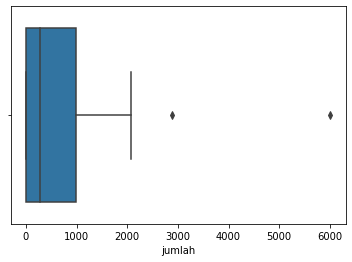

In [65]:
sns.boxplot(pengunjung['jumlah'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


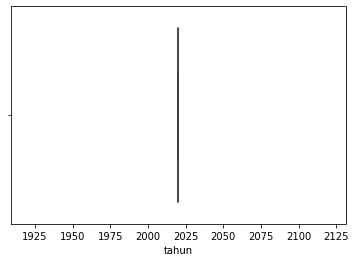

In [66]:
sns.boxplot(pengunjung["tahun"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


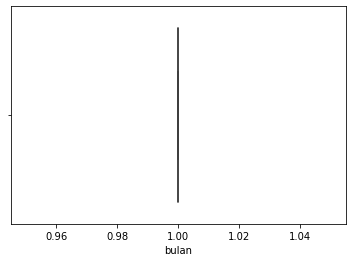

In [67]:
sns.boxplot(pengunjung["bulan"])

Membuat Fungsi Outlier Detection

In [69]:
def outlier(sample):
  Q1=sample.quantile(0.25)
  Q3=sample.quantile(0.75)

  IQR=Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
  print("Number Of Outlier {}".format(number_outlier))

  if number_outlier>0:
    print("Outlier observation row: ")
  else:
    pass
  for i in range(len(sample)):
    if sample[i]<lower_range:
      print[i]
    elif sample[i]>upper_range:
      print(i)
    else:
      pass        


In [70]:
outlier(pengunjung['jumlah'])

Number Of Outlier 2
Outlier observation row: 
4
19


In [71]:
pengunjung.loc[[4,19],"jumlah"]

4     2877
19    6009
Name: jumlah, dtype: int64

In [72]:
outlier(pengunjung['tahun'])

Number Of Outlier 0


In [73]:
outlier(pengunjung['bulan'])

Number Of Outlier 0


Feature Scalling

In [74]:
y=pengunjung['tahun']
x=pengunjung.iloc[:,3:]

scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x,columns=['jumlah'])

Data Partition

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Linear Regretion

In [77]:
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()

In [78]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  tahun   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -14.00
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               1.00
Time:                        14:31:59   Log-Likelihood:                 415.03
No. Observations:                  16   AIC:                            -826.1
Df Residuals:                      14   BIC:                            -824.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2020.0000   3.53e-13   5.71e+15      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
